# Библиотека scipy (модуль scipy.stats)

Нам пригодится только модуль `scipy.stats`.
Полное описание http://docs.scipy.org/doc/scipy/reference/stats.html

In [1]:
import scipy.stats as sps
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(font_scale=1.4, palette='Set2')

## Работа с библиотекой scipy.stats

<b>Общий принцип:</b>

$X$ — некоторое распределение с параметрами `params`


* `X.rvs(size=N, params)` — генерация выборки размера $N$ (<b>R</b>andom <b>V</b>ariate<b>S</b>). Возвращает `numpy.array`
* `X.cdf(x, params)` — значение функции распределения в точке $x$ (<b>C</b>umulative <b>D</b>istribution <b>F</b>unction)
* `X.logcdf(x, params)` — значение логарифма функции распределения в точке $x$
* `X.ppf(q, params)` — $q$-квантиль (<b>P</b>ercent <b>P</b>oint <b>F</b>unction)
* `X.mean(params)` — математическое ожидание
* `X.median(params)` — медиана
* `X.var(params)` — дисперсия (<b>Var</b>iance)
* `X.std(params)` — стандартное отклонение = корень из дисперсии (<b>St</b>andard <b>D</b>eviation)

Кроме того для непрерывных распределений определены функции
* `X.pdf(x, params)` — значение плотности в точке $x$ (<b>P</b>robability <b>D</b>ensity <b>F</b>unction)
* `X.logpdf(x, params)` — значение логарифма плотности в точке $x$

А для дискретных
* `X.pmf(k, params)` — значение дискретной плотности в точке $k$ (<b>P</b>robability <b>M</b>ass <b>F</b>unction)
* `X.logpdf(k, params)` — значение логарифма дискретной плотности в точке $k$


Параметры могут быть следующими:
* `loc` — параметр сдвига
* `scale` — параметр масштаба
* и другие параметры (например, $n$ и $p$ для биномиального)

Для примера сгенерируем выборку размера $N = 200$ из распределения $\mathscr{N}(1, 9)$ и посчитаем некоторые статистики.
В терминах выше описанных функций у нас $X$ = `sps.norm`, а `params` = (`loc=1, scale=3`).

In [2]:
sample = sps.norm.rvs(size=200, loc=1, scale=3)
print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Первые 10 значений выборки:
 [-1.49495261  2.21008113 -0.38165531  1.22238434  2.48219001  2.0660482
  4.19069509  6.27902889 -0.44410345 -2.47226661]
Выборочное среденее: 1.110
Выборочная дисперсия: 9.509


In [3]:
print('Плотность:\t\t', sps.norm.pdf([-1, 0, 1, 2, 3], loc=1, scale=3))
print('Функция распределения:\t', sps.norm.cdf([-1, 0, 1, 2, 3], 
                                               loc=1, scale=3))

Плотность:		 [0.10648267 0.12579441 0.13298076 0.12579441 0.10648267]
Функция распределения:	 [0.25249254 0.36944134 0.5        0.63055866 0.74750746]


$p$-квантиль - это $min\{x: F(x) \geq p\}$

In [4]:
print('Квантили:', sps.norm.ppf([0.05, 0.1, 0.5, 0.9, 0.95], 
                                loc=1, scale=3))

Квантили: [-3.93456088 -2.8446547   1.          4.8446547   5.93456088]


Cгенерируем выборку размера $N = 200$ из распределения $Bin(10, 0.6)$ и посчитаем некоторые статистики.
В терминах выше описанных функций у нас $X$ = `sps.binom`, а `params` = (`n=10, p=0.6`).

In [5]:
sample = sps.binom.rvs(size=200, n=10, p=0.6)
print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Первые 10 значений выборки:
 [7 6 7 3 9 6 5 4 8 4]
Выборочное среденее: 5.945
Выборочная дисперсия: 2.572


In [6]:
print('Дискретная плотность:\t', sps.binom.pmf([-1, 0, 5, 5.5, 10], 
                                               n=10, p=0.6))
print('Функция распределения:\t', sps.binom.cdf([-1, 0, 5, 5.5, 10], 
                                                n=10, p=0.6))

Дискретная плотность:	 [0.00000000e+00 1.04857600e-04 2.00658125e-01 0.00000000e+00
 6.04661760e-03]
Функция распределения:	 [0.00000000e+00 1.04857600e-04 3.66896742e-01 3.66896742e-01
 1.00000000e+00]


In [7]:
print('Квантили:', sps.binom.ppf([0.05, 0.1, 0.5, 0.9, 0.95], n=10, p=0.6))

Квантили: [3. 4. 6. 8. 8.]


Отдельно есть класс для <b>многомерного нормального распределения</b>.
Для примера сгенерируем выборку размера $N=200$ из распределения $\mathcal{N} \left( \begin{pmatrix} 1 \\ 1 \end{pmatrix},  \begin{pmatrix} 2 & 1 \\ 1 & 2 \end{pmatrix} \right)$.

In [8]:
sample = sps.multivariate_normal.rvs(
    mean=[1, 1], cov=[[2, 1], [1, 2]], size=200
)

print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее:', sample.mean(axis=0))
print('Выборочная матрица ковариаций:\n', np.cov(sample.T))

Первые 10 значений выборки:
 [[ 2.43610487  2.71300417]
 [ 0.16155824  1.3918426 ]
 [ 3.09250251  2.40118989]
 [ 2.50822699  2.87782049]
 [ 1.24511661  2.48524395]
 [ 3.5324472   2.37221204]
 [ 3.28723411  2.68141736]
 [ 1.30667295  0.98890586]
 [-1.55047981 -1.90713123]
 [ 2.20269368  1.44721138]]
Выборочное среденее: [1.05117049 1.06942216]
Выборочная матрица ковариаций:
 [[1.73593103 0.85773794]
 [0.85773794 1.78836671]]


Некоторая хитрость :)

In [9]:
sample = sps.norm.rvs(size=10, loc=np.arange(10), scale=0.1)
print(sample)

[-0.15495196  0.96037016  1.95019837  3.16441372  4.0406247   5.11443645
  6.00588815  6.92606736  7.92932381  8.91235691]


Бывает так, что <b>надо сгенерировать выборку из распределения, которого нет в `scipy.stats`</b>.
Для этого надо создать класс, который будет наследоваться от класса `rv_continuous` для непрерывных случайных величин и от класса `rv_discrete` для дискретных случайных величин.
Пример есть на странице http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous

Для примера сгенерируем выборку из распределения с плотностью $f(x) = \frac{4}{15} x^3 I\{x \in [1, 2] = [a, b]\}$.

In [10]:
class cubic_gen(sps.rv_continuous):
    def _pdf(self, x):
        return 4 * x ** 3 / 15
cubic = cubic_gen(a=1, b=2, name='cubic')

sample = cubic.rvs(size=200)
print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Первые 10 значений выборки:
 [1.7791282  1.81886001 1.05230695 1.8136159  1.99559756 1.36990105
 1.61765599 1.83394204 1.9335504  1.44385338]
Выборочное среденее: 1.632
Выборочная дисперсия: 0.073


Если дискретная случайная величина может принимать небольшое число значений, то можно не создавать новый класс, как показано выше, а явно указать эти значения и из вероятности.

In [11]:
some_distribution = sps.rv_discrete(name='some_distribution', 
                                    values=([1, 2, 3], [0.6, 0.1, 0.3]))

sample = some_distribution.rvs(size=200)
print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Частота значений по выборке:', 
      (sample == 1).mean(), (sample == 2).mean(), (sample == 3).mean())

Первые 10 значений выборки:
 [1 1 1 1 1 1 1 1 1 1]
Выборочное среденее: 1.615
Частота значений по выборке: 0.645 0.095 0.26


## Свойства абсолютно непрерывных распределений

Прежде чем исследовать свойства распределений, напишем вспомогательную функцию для отрисовки плотности распределения. 

In [12]:
def show_pdf(pdf,  xmin, xmax, ymax, grid_size, distr_name, **kwargs):
    """
    Рисует график плотности непрерывного распределения
    
    pdf - плотность
    xmin, xmax - границы графика по оси x
    ymax - граница графика по оси y
    grid_size - размер сетки, по которой рисуется график
    distr_name - название распределения
    kwargs - параметры плотности
    """
    
    grid = np.linspace(xmin, xmax, grid_size)  
    plt.figure(figsize=(12, 5))
    plt.plot(grid, pdf(grid, **kwargs), lw=5)
    plt.grid(ls=':')
    plt.xlabel('Значение', fontsize=18)
    plt.ylabel('Плотность', fontsize=18)
    plt.xlim((xmin, xmax))
    plt.ylim((None, ymax))
    title = 'Плотность {}'.format(distr_name)
    plt.title(title.format(**kwargs), fontsize=20)
    plt.show()

### Нормальное распределение

$\mathcal{N}(a, \sigma^2)$ - нормальное распределение. 
  
Параметры в scipy.stats:  
* `loc` = a
* `scale` = $\sigma$

Свойства распределения: 
* математическое ожидание: a
* дисперсия: $\sigma^2$

Посмотрим, как выглядит плотность нормального стандартного распределения $\mathcal{N}(0, 1)$:

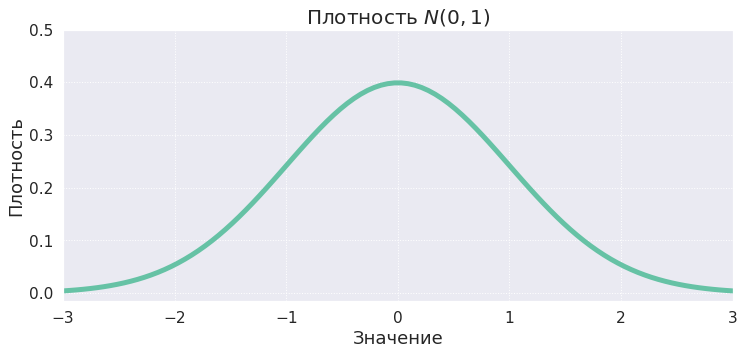

In [13]:
show_pdf(pdf=sps.norm.pdf, xmin=-3, xmax=3, ymax=0.5, 
         grid_size=100, distr_name=r'$N({loc}, {scale})$', 
         loc=0, scale=1)

Сгенерируем значения из нормального стандартного распределения и сравним гистограмму с плотностью:

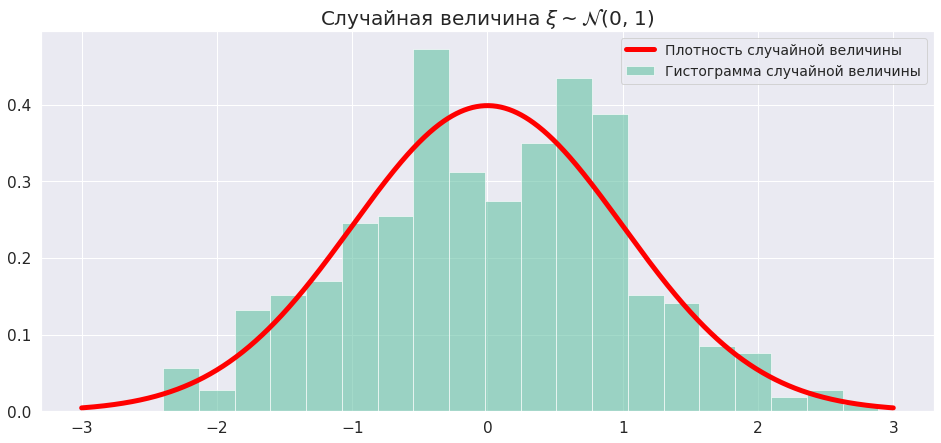

In [14]:
plt.figure(figsize=(16, 7))
sample = sps.norm.rvs(size=400)
plt.hist(sample,  bins=20, density=True, 
         alpha=0.6, label='Гистограмма случайной величины') 
grid = np.linspace(-3, 3, 1000)
plt.plot(grid, sps.norm.pdf(grid), color='red', 
         lw=5, label='Плотность случайной величины') 
plt.title(r'Случайная величина $\xi \sim \mathcal{N}$(0, 1)', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

Исследуем, как меняется плотность распределения в зависимости от параметров:

In [15]:
# создать виджет, но не отображать его
ip = widgets.interactive(show_pdf,
pdf=widgets.fixed(sps.norm.pdf),
grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100),
xmin=widgets.FloatSlider(min=-10, max=0, step=0.1, value=-5),
xmax=widgets.FloatSlider(min=0, max=10, step=0.1, value=5),
ymax=widgets.FloatSlider(min=0, max=2, step=0.1, value=1),
loc = widgets.FloatSlider(min=-10, max=10, step=0.1, value=0),
scale = widgets.FloatSlider(min=0.01, max=2, step=0.01, value=1),
distr_name = r'$N$({loc}, {scale})');

# отображаем слайдеры группами
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[5:7]))

# отображаем вывод функции
display(ip.children[-1])
ip.update() # чтобы функция запустилась до первого изменения слайдеров

Output()

Показательный пример с разными значениями параметров распределения: 

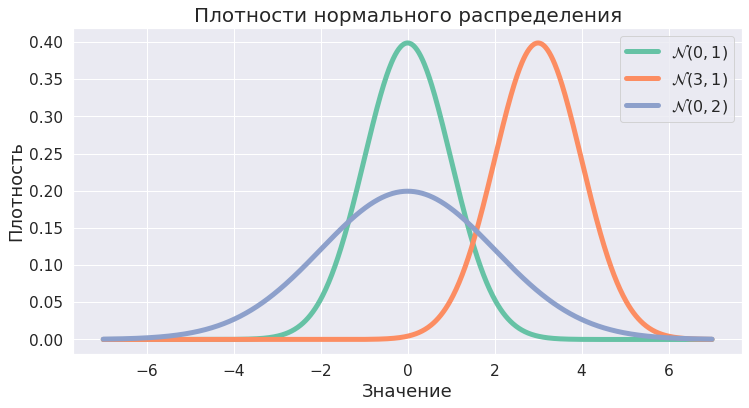

In [16]:
grid = np.linspace(-7, 7, 1000)  # сетка для построения графика
loc_values = [0, 3, 0]  # набор значений параметра a
sigma_values = [1, 1, 2]  # набор значений параметра sigma

plt.figure(figsize=(12, 6))

for i, (a, sigma) in enumerate(zip(loc_values, sigma_values)):
    plt.plot(grid, sps.norm(a, sigma).pdf(grid), lw=5, 
             label='$\mathcal{N}' + '({}, {})$'.format(a, sigma))

plt.legend(fontsize=16)
plt.title('Плотности нормального распределения', fontsize=20)
plt.xlabel('Значение', fontsize=18)
plt.ylabel('Плотность', fontsize=18)
plt.show()

Значения параметров определяют положение и форму кривой на графике распределения, каждой комбинации параметров соответствует уникальное распределение.


Для нормального распределения:
* параметр $\mathcal{loc = a}$ отвечает за смещение кривой вдоль $\mathcal{Ox}$, тем самым определяя положение вертикальной оси симметрии плотности распределения. Вероятность того, что значение случайной величины $х$ попадет в отрезок $\mathcal{[m; n]}$, равна площади участка, зажатого кривой плотности, $\mathcal{Ox}$ и вертикальными прямыми $\mathcal{x = m}$, $\mathcal{x = n}$. В точке $a$ значение плотности распределения наибольшее, соответственно вероятность того, что значение случайной величины, имеющей нормальное распределение, попадет в окрестность точки $а$ - наибольшая.

  
* параметр $\mathcal{scale = \sigma}$ отвечает за смещение экстремума вдоль  $\mathcal{Oy}$ и "прижимание" кривой к вертикальной прямой  $\mathcal{x = a}$, тем самым увеличивая площадь под кривой плотности в окрестности точки $а$. Другими словами, этот параметр отвечает за дисперсию - меру разброса значений случайной величины. При уменьшении параметра $\sigma$ увеличивается вероятность того, что нормально распределенная случайная величина будет равна $a$. Это соответствует мере разброса значений случайной величины относительно её математического ожидания, то есть дисперсии $\sigma$<sup>2</sup>.

Проверим несколько полезных свойств нормального распределения.

Пусть $\xi_1 \sim \mathcal{N}(a_1, \sigma_1^2)$ и $\xi_2 \sim \mathcal{N}(a_2, \sigma_2^2)$ - независимые случайные величины. Тогда $\xi_3 = \xi_1 + \xi_1 \sim \mathcal{N}(a_1 + a_2, \sigma_1^2 + \sigma_2^2)$ 

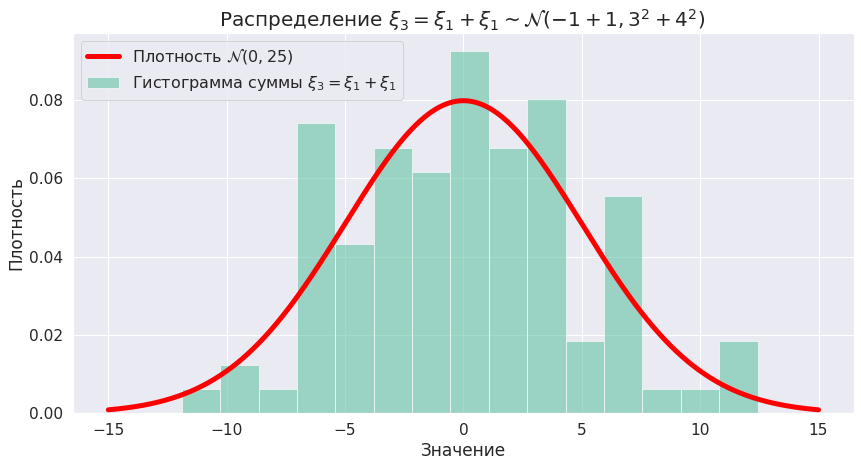

In [17]:
sample1 = sps.norm(loc=-1, scale=3).rvs(size=100)
sample2 = sps.norm(loc=1, scale=4).rvs(size=100)

sample3 = sample1 + sample2

plt.figure(figsize=(14,7))
plt.hist(sample3, density=True, bins=15, alpha=0.6, 
         label=r'Гистограмма суммы $\xi_3 = \xi_1 + \xi_1$')
grid = np.linspace(-15, 15, 1000)
plt.plot(grid, sps.norm(-1 + 1, np.sqrt(3*3 + 4*4)).pdf(grid), 
         color='red', lw=5, label=r'Плотность $\mathcal{N}(0, 25)$')
plt.title(
    r'Распределение $\xi_3=\xi_1+\xi_1\sim\mathcal{N}(-1 + 1, 3^2 + 4^2)$ ', 
    fontsize=20
)
plt.xlabel('Значение', fontsize=17)
plt.ylabel('Плотность', fontsize=17)
plt.legend(fontsize=16)
plt.show()

Пусть $\xi \sigma \mathcal{N}(a, \sigma^2)$. Тогда $\xi_{new} = c\cdot\xi\sim\mathcal{N}(c \cdot a,  c^2 \cdot \sigma^2)$ 

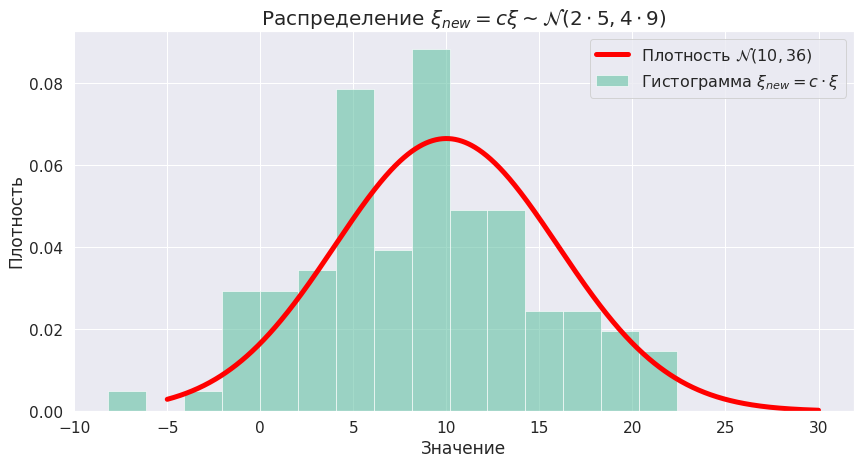

In [18]:
sample = sps.norm(loc=5, scale=3).rvs(size=100)

c = 2
new_sample = c*sample

plt.figure(figsize=(14,7))
plt.hist(new_sample, density=True, bins=15, alpha=0.6, 
         label=r'Гистограмма $\xi_{new} = c \cdot \xi$')
grid = np.linspace(-5, 30, 1000)
plt.plot(grid, sps.norm(c*5, c*3).pdf(grid), color='red', 
         lw=5, label=r'Плотность $\mathcal{N}(10, 36)$')
plt.title(
    r'Распределение $\xi_{new}=c \xi\sim\mathcal{N}(2\cdot5, 4\cdot9)$', 
    fontsize=20
)
plt.xlabel('Значение', fontsize=17)
plt.ylabel('Плотность', fontsize=17)
plt.legend(fontsize=16)
plt.show()

## Равномерное распределение

$\mathcal{U}(a, b)$ - равномерное распределение. 
  
Параметры в scipy.stats:  
* `loc` = a
* `scale` = b-a

Свойства распределения: 
* математическое ожидание: $\frac{a+b}{2}$
* дисперсия: $\frac{(b-a)^2}{12}$

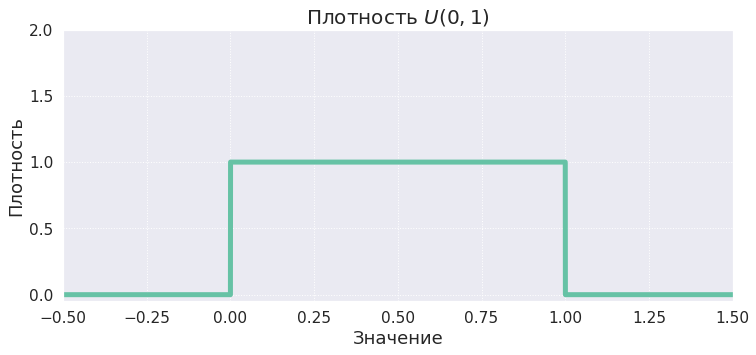

In [19]:
show_pdf(pdf=sps.uniform.pdf, xmin=-0.5, xmax=1.5, ymax=2, 
         grid_size=10000, distr_name=r'$U(0, 1)$', 
         loc=0, scale=1)

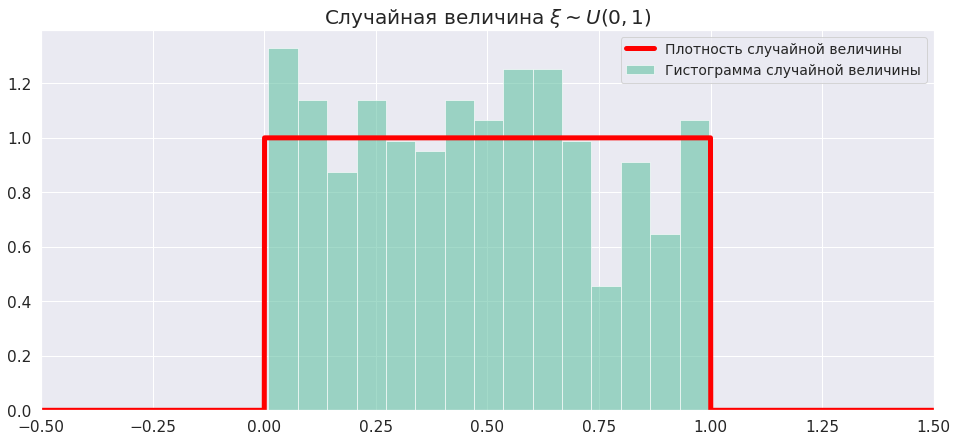

In [20]:
grid = np.linspace(-3, 3, 10001)
plt.figure(figsize=(16, 7))
sample = sps.uniform.rvs(size=400)
plt.hist(sample,  bins=15, density=True, alpha=0.6, 
         label='Гистограмма случайной величины') 
plt.plot(grid, sps.uniform.pdf(grid), color='red', lw=5, 
         label='Плотность случайной величины') 
plt.title(r'Случайная величина $\xi\sim U(0, 1)$', fontsize=20)
plt.xlim(-0.5, 1.5)
plt.legend(fontsize=14, loc=1)
plt.show()

In [21]:
# создать виджет, но не отображать его
ip = widgets.interactive(
    show_pdf,
    pdf=widgets.fixed(sps.uniform.pdf),
    grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100),
    xmin=widgets.FloatSlider(min=-10, max=0, step=0.1, value=-5),
    xmax=widgets.FloatSlider(min=0, max=10, step=0.1, value=5),
    ymax=widgets.FloatSlider(min=0, max=2, step=0.1, value=1.4),
    loc=widgets.FloatSlider(min=-4, max=0, step=0.1, value=0),
    scale=widgets.FloatSlider(min=0.01, max=4, step=0.01, value=1),
    distr_name=r'$U$({loc}, {loc} + {scale})'
);

# отображаем слайдеры группами
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[5:7]))
# отображаем вывод функции
display(ip.children[-1])

ip.update()  # чтобы функция запустилась до первого изменения слайдеров

Output()

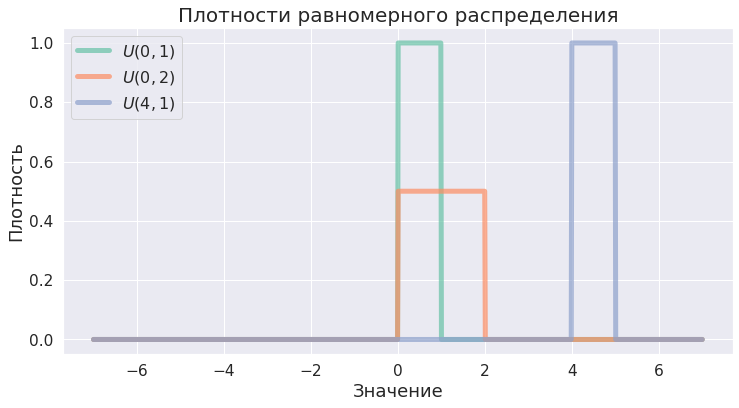

In [22]:
grid = np.linspace(-7, 7, 1000)  # сетка для построения графика
loc_values = [0, 0, 4]  # набор значений параметра a
scale_values = [1, 2, 1]  # набор значений параметра scale

plt.figure(figsize=(12, 6))
for i, (loc, scale) in enumerate(zip(loc_values, scale_values)):
    plt.plot(grid, sps.uniform(loc, scale).pdf(grid), lw=5, alpha=0.7, 
             label='$U' + '({}, {})$'.format(loc, scale))

plt.legend(fontsize=16)
plt.title('Плотности равномерного распределения', fontsize=20)
plt.xlabel('Значение', fontsize=18)
plt.ylabel('Плотность', fontsize=18)
plt.show()

Для равномерного распределения:
* параметр $\mathcal{loc = a}$ - определяет начало отрезка, на котором случайная величина равномерно распределена.
* параметр $\mathcal{scale = b-a}$ - определяет длину отрезка, на котором задана случайная величина. Значение плотности распределения на данном отрезке убывает с ростом данного параметра, то есть с ростом длины этого отрезка. Чем меньше длина отрезка, тем больше значение плотности вероятности на отрезке.

-----

Введение в анализ данных, 2020

<a href="https://mipt-stats.gitlab.io">mipt-stats.gitlab.io</a>